In [9]:
!unzip /content/TheMovies.zip


unzip:  cannot find or open /content/TheMovies.zip, /content/TheMovies.zip.zip or /content/TheMovies.zip.ZIP.


**Importing all the libraraies or dependencies**

In [10]:
# Data visualization and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configure matplotlib for Jupyter Notebook
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

# Deep Learning libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input, Embedding, Dot
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Check backend used by Keras
from tensorflow.keras import backend as K
print("Keras Backend:", K.backend())
from keras.models import Model


Keras Backend: tensorflow


#Data Loading and Exploration

In [11]:
ratings=pd.read_csv('/content/ratings_small.csv')

In [12]:
df=ratings.copy()

In [13]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [14]:
#printing all the unique users
df['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [15]:
#printing the length of the number of users
len(df['userId'].unique())

671

In [16]:
#printing all the unique movies
df['movieId'].unique()

array([  31, 1029, 1061, ...,  129, 4736, 6425])

In [17]:
#printing length of the number of unique movies
len(df['movieId'].unique())

9066

In [18]:
df['userId'].isnull().sum()

0

In [19]:
df['rating'].isnull().sum()

0

In [20]:
df['movieId'].isnull().sum()

0

#the minimum and maximum ratings in the dataset

In [21]:
 # minimum rating
df['rating'].min()

0.5

In [22]:
# maximum rating
df['rating'].max()

5.0

#Data Preparation

In [23]:
df.userId = df.userId.astype('category').cat.codes.values
df.movieId = df.movieId.astype('category').cat.codes.values

In [24]:
df['userId'].value_counts(ascending=True)

0        20
497      20
447      20
444      20
443      20
       ... 
72     1610
14     1700
623    1735
563    1868
546    2391
Name: userId, Length: 671, dtype: int64

In [25]:
df['movieId'].unique()

array([  30,  833,  859, ...,  115, 3712, 4629], dtype=int16)

In [26]:
# creating utility matrix
index=list(df['userId'].unique())
columns=list(df['movieId'].unique())

index=sorted(index)
columns=sorted(columns)
# Nan implies that user has not rated the corressponding movie
util_df=pd.pivot_table(data=df,values='rating',index='userId',columns='movieId')

In [27]:
util_df

movieId,0,1,2,3,4,5,6,7,8,9,...,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
util_df.fillna(0)

movieId,0,1,2,3,4,5,6,7,8,9,...,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065
userId,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Splitting the Data into Train and Test Sets

In [29]:
users = df.userId.unique()
movies = df.movieId.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

In [30]:
df['userId'] = df['userId'].apply(lambda x: userid2idx[x])
df['movieId'] = df['movieId'].apply(lambda x: movieid2idx[x])

from sklearn.model_selection import train_test_split
train , test = train_test_split(df,test_size= 0.2)

#Exploring the Processed Dataset

In [31]:
train.head(32)

,userId,movieId,rating,timestamp
45810,327,279,3.0,1147995693
73469,513,23,4.0,853893935
79979,546,7940,2.5,1085447007
95612,626,473,4.0,1201380811
43677,310,771,2.5,1062015592
49383,358,583,4.5,1339227138
90707,601,155,3.0,842356080
83376,563,2243,5.0,974837450
89276,594,237,1.0,965230150
71800,504,1946,3.5,1340411787


In [32]:
test.head(15)

,userId,movieId,rating,timestamp
12018,75,448,5.0,1194384499
41786,298,1379,3.5,1344187134
70363,486,3549,4.0,832837844
68910,476,832,1.0,1329273645
25433,186,321,3.5,1228072708
73361,509,3622,4.0,955531109
19410,129,72,3.0,1138999196
68316,474,1241,2.5,1447239506
8739,55,1830,4.0,1467006422
5945,29,2859,4.0,1015205545


In [33]:
len(test), len(train)

(20001, 80003)

In [34]:
len(df.userId.unique()),len(df.movieId.unique())

(671, 9066)

In [35]:
df

,userId,movieId,rating,timestamp
0,0,0,2.5,1260759144
1,0,1,3.0,1260759179
2,0,2,3.0,1260759182
3,0,3,2.0,1260759185
4,0,4,4.0,1260759205
...,...,...,...,...
99999,670,7005,2.5,1065579370
100000,670,4771,4.0,1065149201
100001,670,1329,4.0,1070940363
100002,670,1331,2.5,1070979663


In [36]:
import tensorflow as tf
print (tf.version)


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [37]:

max_movieId = df["movieId"].max()
print(max_movieId)
max_userId = df["userId"].max()
print(max_userId)

9065
670


#Creating a deep learning model

In [38]:
import keras
from keras.optimizers import Adam
from keras.layers import Dense, Dropout
#Latent Factors and Inputs
n_latent_factors_users = 20 #10
n_latent_factors_movie =20 #10
n_latent_factors_mf = 20 #10

n_users, n_movies = len(df.userId.unique()), len(df.movieId.unique())

#defining the shape of the input tensor
movie_input = keras.layers.Input(shape= [1], name ='Item')

#Embedding Layers
movie_embedding_mlp = keras.layers.Embedding(max_movieId + 1, n_latent_factors_movie, name='Movie-Embeddding-MLP') (movie_input)
movie_vec_mlp = keras.layers.Flatten(name='FlattenMovies-MLP')(movie_embedding_mlp)
movie_vec_mlp = keras.layers.Dropout(0.5)(movie_vec_mlp)
#MF
movie_embedding_mf = keras.layers.Embedding(max_movieId + 1, n_latent_factors_mf, name='Movie-Embedding-MF')(movie_input)
movie_vec_mf = keras.layers.Flatten(name= 'FlattenMovie-MF')(movie_embedding_mf)
movie_vec_mf = keras.layers.Dropout(0.5)(movie_vec_mf)


#MLP
user_input = keras.layers.Input( shape= [1] , name ='User')
user_vec_mlp = keras.layers.Flatten(name='FlattenUser-MLP')(keras.layers.Embedding(n_users +1, n_latent_factors_users, name='User_Embedding_MLP')(user_input))
user_vec_mlp = keras.layers.Dropout(0.5)(user_vec_mlp)

user_vec_mf = keras.layers.Flatten(name='FlattenUsers-MF')(keras.layers.Embedding(n_users +1, n_latent_factors_mf , name='User-Embedding-MF')(user_input))
user_vec_mf = keras.layers.Dropout(0.5)(user_vec_mf)

#Combining MLP and MF
concat = keras.layers.concatenate([movie_vec_mlp, user_vec_mlp],name='Concat')
concat_dropout = keras.layers.Dropout(0.5)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat_dropout)
dense_batch = keras.layers.BatchNormalization(name='Batch')(dense)

dropout_1 = keras.layers.Dropout(0.5,name='Dropout-1')(dense_batch)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(dropout_1)
dense_batch_2 = keras.layers.BatchNormalization(name='Batch-2')(dense_2)


dropout_2 = keras.layers.Dropout(0.5,name='Dropout-2')(dense_batch_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dropout_2)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)

pred_mf = keras.layers.dot([movie_vec_mf, user_vec_mf], axes= 1 , name='Dot')


pred_mlp = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)

combine_mlp_mf = keras.layers.concatenate([pred_mf, pred_mlp], name='Concat-MF-MLP')
result_combine = keras.layers.Dense(100,name='Combine-MF-MLP')(combine_mlp_mf)
deep_combine = keras.layers.Dense(100,name='FullyConnected-4')(result_combine)


result = keras.layers.Dense(1,name='Prediction')(deep_combine)


model = keras.Model([user_input, movie_input], result)
opt = keras.optimizers.Adam(lr =0.0005)
model.compile(optimizer='adam',loss= 'mean_squared_error')

#Training the Model

In [40]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Specify the batch size
batch_size = 128  # You can change this number according to your requirement

# Train the model with the specified batch size
history = model.fit([train.userId, train.movieId], train.rating,
                    epochs=20,
                    batch_size=batch_size,  # Add the batch size here
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/20
563/563 [==============================] - 16s 28ms/step - loss: 0.6033 - val_loss: 0.8050
Epoch 2/20
563/563 [==============================] - 7s 12ms/step - loss: 0.5886 - val_loss: 0.8082
Epoch 3/20
563/563 [==============================] - 6s 10ms/step - loss: 0.5850 - val_loss: 0.8033
Epoch 4/20
563/563 [==============================] - 6s 11ms/step - loss: 0.5800 - val_loss: 0.8023
Epoch 5/20
563/563 [==============================] - 5s 10ms/step - loss: 0.5767 - val_loss: 0.8076
Epoch 6/20
563/563 [==============================] - 5s 9ms/step - loss: 0.5716 - val_loss: 0.8133
Epoch 7/20
563/563 [==============================] - 6s 11ms/step - loss: 0.5688 - val_loss: 0.8226


#Plotting Training Loss

Text(0, 0.5, 'training loss')

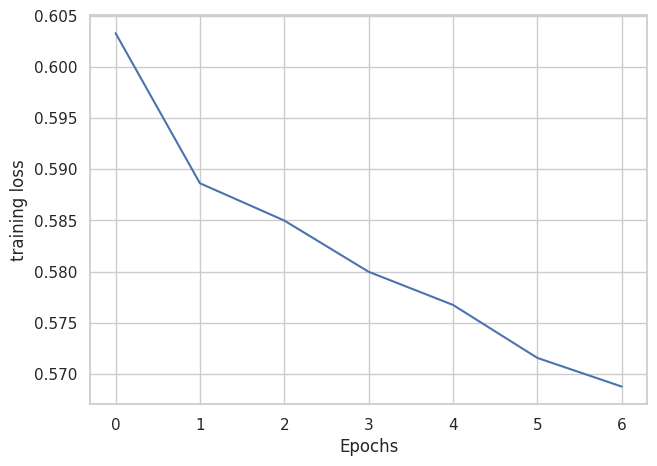

In [43]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('training loss')

#Evaluation

In [41]:
from sklearn.metrics import mean_absolute_error
y_true = test.rating
y_hat_2 = np.round(model.predict([test.userId, test.movieId]),0)
print(mean_absolute_error(y_true, y_hat_2))

print(mean_absolute_error(y_true, model.predict([test.userId, test.movieId])))

626/626 [==============================] - 2s 2ms/step
0.6708414579271036
626/626 [==============================] - 2s 3ms/step
0.6766215592859673


In [42]:
from sklearn.metrics import mean_squared_error
y_true = test.rating
y_hat_2 = np.round(model.predict([test.userId, test.movieId]),0)
#print(mean_squared_error(y_true, y_hat_2))

print(mean_squared_error(y_true, model.predict([test.userId, test.movieId])))

626/626 [==============================] - 1s 2ms/step
0.7707793212020994


#Recommendations & Prediction

In [44]:
prediction= model.predict([test.userId,test.movieId],batch_size =10, verbose=1)

2001/2001 [==============================] - 5s 2ms/step


In [45]:
movie_data = np.array(list(set(df.movieId)))
movie_data[:5]

array([0, 1, 2, 3, 4])

In [46]:
#predicting for 14th user
user = np.array([14 for i in range(len(movie_data))])
user[:5]

array([14, 14, 14, 14, 14])

In [47]:
predictions = model.predict([user, movie_data])
predictions = np.array([a[0] for a in predictions])
recommended_movie_ids = (-predictions).argsort()[:5]

print(recommended_movie_ids)
print(predictions[recommended_movie_ids])

284/284 [==============================] - 1s 2ms/step
[ 857 1442 1202 1023 1440]
[4.806755  4.509063  4.454978  4.3558736 4.260447 ]
